In [1]:
import pandas as pd
from pymongo import MongoClient

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
client = MongoClient("mongodb://127.0.0.1:27017/housing_db")
db = client["housing_db"]
collection = db["apis_housingconditions"]

In [3]:
results = collection.find(
    {},
    {"_id": 0, "HouseStyle": 1, "YearBuilt": 1, "YearRemodAdd": 1}
)
results = [result for result in results]
housing_condition = pd.DataFrame(results)

<Figure size 360x360 with 0 Axes>

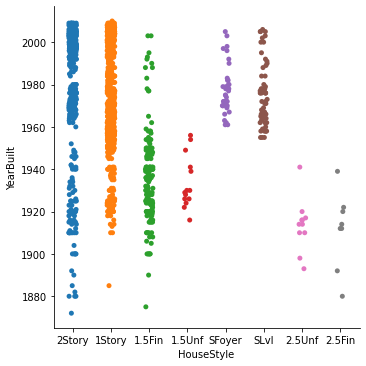

In [4]:
plt.figure(figsize=(5,5))
sns.catplot(x="HouseStyle", y="YearBuilt", data=housing_condition)
plt.show()

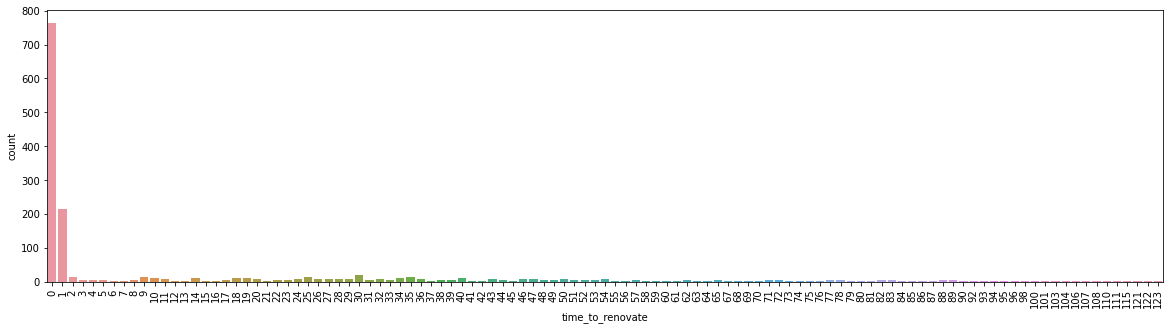

In [5]:
housing_condition["time_to_renovate"] = housing_condition["YearRemodAdd"] - housing_condition["YearBuilt"]

# Plotting
plt.figure(figsize=(20,5))
sns.countplot(x="time_to_renovate", data=housing_condition)
plt.xticks(rotation=90)
plt.show()

In [6]:
collection = db["apis_interiorfeatures"]

In [7]:
results = collection.find(
    {},
    {"_id": 0, "SaleCondition": 1, "SalePrice": 1}
)
results = [result for result in results]
sale_data = pd.DataFrame(results)

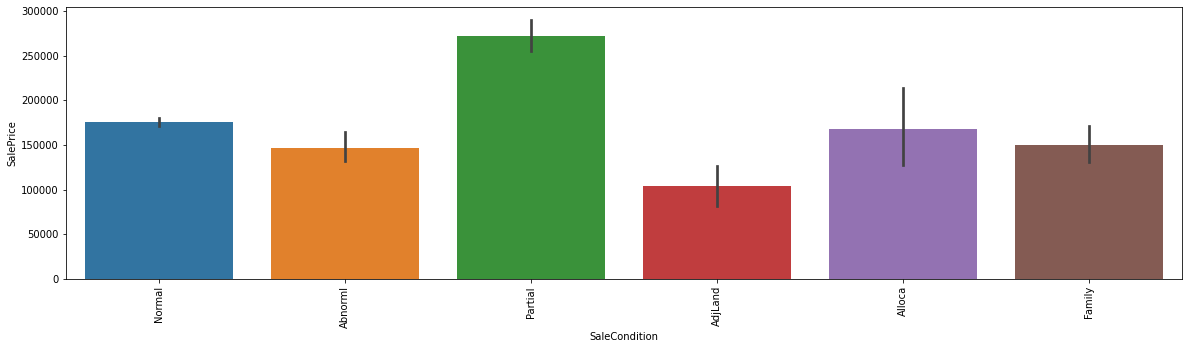

In [8]:
# Plotting
plt.figure(figsize=(20,5))
sns.barplot(x="SaleCondition", y="SalePrice", data=sale_data)
plt.xticks(rotation=90)
plt.show()